## Import libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import re

## Load cleaned dataset

In [46]:
df = pd.read_csv('../data/processed/DataScientist_cleaned.csv')

## Select and Encode Features

In [47]:
# Select relevant features for prediction
features = ['Rating', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Easy Apply']

# Handle categorical features by encoding them
categorical_features = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Easy Apply']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


## Handle Missing Values

In [49]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # For numerical columns
df['Rating'] = imputer.fit_transform(df[['Rating']])
df['Founded'] = imputer.fit_transform(df[['Founded']])

# For categorical columns, use the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_features:
    df[col] = imputer.fit_transform(df[[col]])


## Preprocess the Target Variable

In [50]:
# Extract numeric part of 'Salary Estimate' and convert to float
def extract_salary(salary_str):
    # Remove non-numeric characters and split on '-'
    salary_str = re.sub(r'[^0-9\-]', '', salary_str)
    if '-' in salary_str:
        salary_min, salary_max = salary_str.split('-')
        return (float(salary_min) + float(salary_max)) / 2  # Average salary
    return float(salary_str)

df['Salary Estimate'] = df['Salary Estimate'].apply(extract_salary)


## Define Features and Target, Split Data

In [51]:
X = df[features]
y = df['Salary Estimate']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build and Evaluate Linear Regression Model

In [52]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')


Linear Regression MSE: 1482.9386666090406
Linear Regression R2: 0.01580737573243529


## Build and Evaluate Decision Tree Regressor

In [56]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree MSE: {mse_tree}')
print(f'Decision Tree R2: {r2_tree}')


Decision Tree MSE: 2045.7333282073937
Decision Tree R2: -0.357706625483023


## Build and Evaluate Random Forest Regressor

In [57]:
# Random Forest Regressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

# Evaluate Random Forest
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print(f'Random Forest MSE: {mse_forest}')
print(f'Random Forest R2: {r2_forest}')


Random Forest MSE: 1502.5785139232196
Random Forest R2: 0.0027728562991023997


## Visualize Model Performance

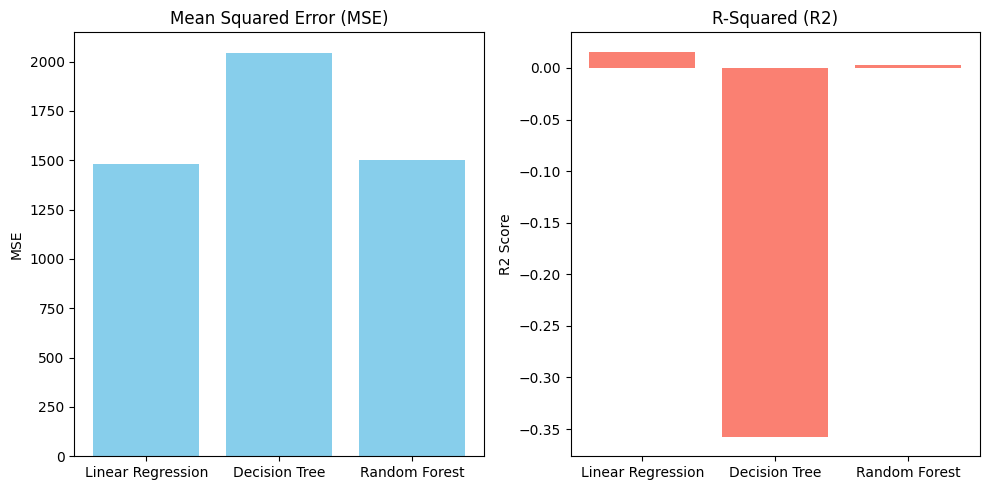

In [58]:
# Visualize Model Performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_tree, mse_forest]
r2_values = [r2_lr, r2_tree, r2_forest]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='salmon')
plt.title('R-Squared (R2)')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()
